In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset = pd.read_csv("ecg.csv")

In [4]:
dataset

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [5]:
x = dataset.values
y = x

In [7]:
pip install -U scikit-learn scipy matplotlib

                                              0.0/9.2 MB ? eta -:--:--
     -                                        0.3/9.2 MB 8.6 MB/s eta 0:00:02
     ---                                      0.9/9.2 MB 11.0 MB/s eta 0:00:01
     -----                                    1.4/9.2 MB 10.7 MB/s eta 0:00:01
     --------                                 1.9/9.2 MB 11.0 MB/s eta 0:00:01
     ----------                               2.3/9.2 MB 11.5 MB/s eta 0:00:01
     ------------                             2.8/9.2 MB 11.3 MB/s eta 0:00:01
     --------------                           3.5/9.2 MB 11.6 MB/s eta 0:00:01
     -----------------                        4.0/9.2 MB 11.7 MB/s eta 0:00:01
     --------------------                     4.6/9.2 MB 11.4 MB/s eta 0:00:01
     ----------------------                   5.2/9.2 MB 11.4 MB/s eta 0:00:01
     -----------------------                  5.5/9.2 MB 11.3 MB/s eta 0:00:01
     --------------------------               6.1/9.2 MB 11.9


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Standardize/Normalize the features using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
features = x_train.shape[1]
# so the input to encoder will be all the features and features matlab jitne column hai wo tho aise we get it 


In [14]:
from tensorflow.keras import layers, models

In [15]:
# Build encoder model : The encoder in an autoencoder is responsible for transforming the input data into a compressed or latent representation. 
# This is achieved through a series of transformations (layers) that reduce the dimensionality of the input. 

# Encoder : layers
encoder = models.Sequential([
    layers.Input(shape=(features,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu')
    
])

# abhi idhar har layer ke baad nuerons kam ho rahe because apne ko dimensions reduce karne hai compress karna hai 


In [16]:
# decoder layers : abhi decoder ka jo input rahega wo ye upar ka commpressed data rahega 
# so we have to use this input aur ab input lekar decoder will give without anamolies wala data 

decoder = models.Sequential([
    layers.Input(shape=(8,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(features, activation='linear')  # Using 'linear' activation for reconstruction
])
# last output layer mai apan wapas features use karre rahe kuki apne ko input data ka mirror image hi
# chaiye tho same features hone cahiye 

#  'Linear' activation allows the network to output real values without imposing any specific constraints on the output range.

In [17]:
# Autoencoder
autoencoder = models.Sequential([
    encoder,
    decoder
])

In [18]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, shuffle=True)


Epoch 1/100

125/125 [==============================] - 1s 1ms/step - loss: 0.6987
Epoch 2/100
125/125 [==============================] - 0s 1ms/step - loss: 0.3289
Epoch 3/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2541
Epoch 4/100
125/125 [==============================] - 0s 1ms/step - loss: 0.2211
Epoch 5/100
125/125 [==============================] - 0s 999us/step - loss: 0.2052
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1951
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1851
Epoch 8/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1765
Epoch 9/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1696
Epoch 10/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1636
Epoch 11/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1582
Epoch 12/100
125/125 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 13/

In [19]:
# abhi we have to test the autoencoder by putting testing ke vaues 
y_pred = autoencoder.predict(x_test)
# uske baad mean square error claculate karna hai ye uska formulae hai 
mse = np.mean(np.power(x_test - y_pred, 2), axis=1)

32/32 [==============================] - 0s 961us/step


In [20]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
# Predict anomalies
anomalies = mse > threshold

In [21]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(num_anomalies)

50


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(anomalies, anomalies))

print("\nClassification Report:")
print(classification_report(anomalies, anomalies))

Confusion Matrix:
[[950   0]
 [  0  50]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



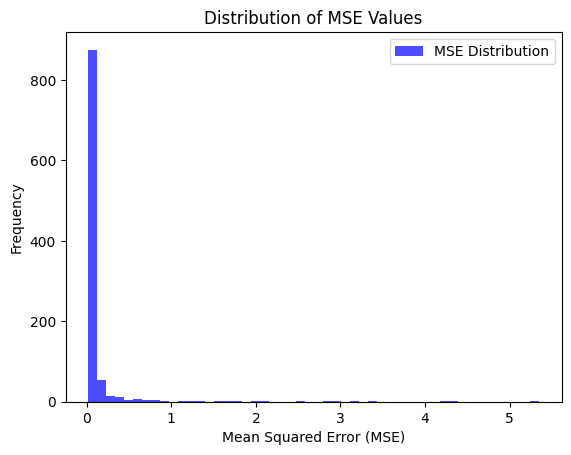

In [24]:
plt.hist(mse, bins=50, color='blue', alpha=0.7, label='MSE Distribution')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.title('Distribution of MSE Values')
plt.legend()
plt.show()

In [28]:
pip install seaborn


                                              0.0/294.6 kB ? eta -:--:--
     -------------------------------------- 294.6/294.6 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


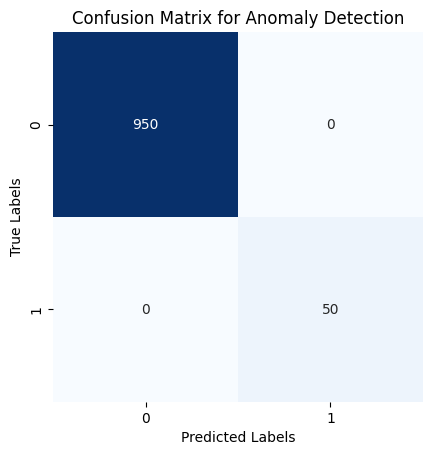

In [29]:
import seaborn as sns
dig = confusion_matrix(anomalies, anomalies)

# Display the confusion matrix as a heatmap
sns.heatmap(dig, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Anomaly Detection')
plt.show()

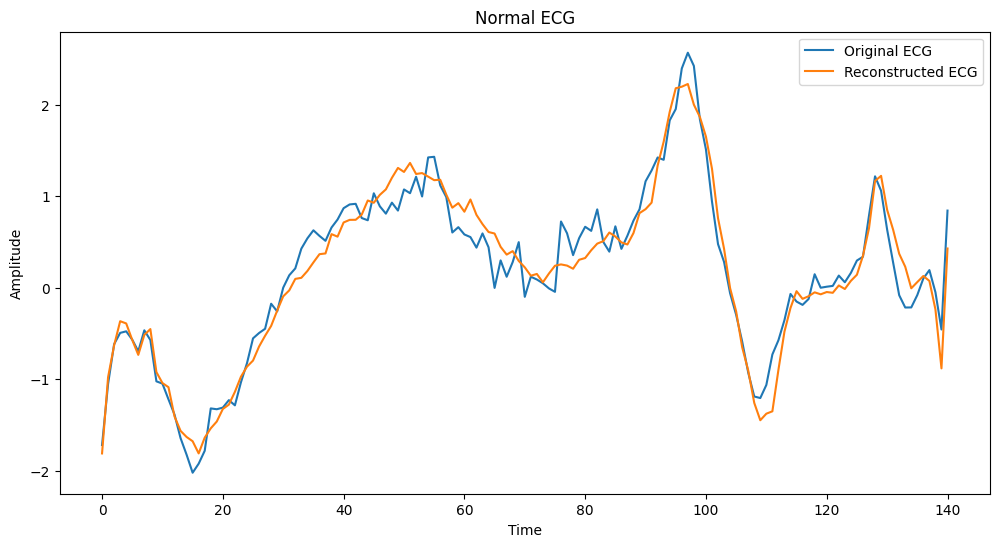

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()